In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:

data = pd.read_csv('bank-full[1].csv', sep=';')
print(data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [3]:
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.drop('y', axis=1)
y = data['y']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2,  random_state=42) 

In [5]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [6]:
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8848833351763795

Confusion Matrix:
 [[7749  203]
 [ 838  253]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      7952
           1       0.55      0.23      0.33      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.86      0.88      0.86      9043



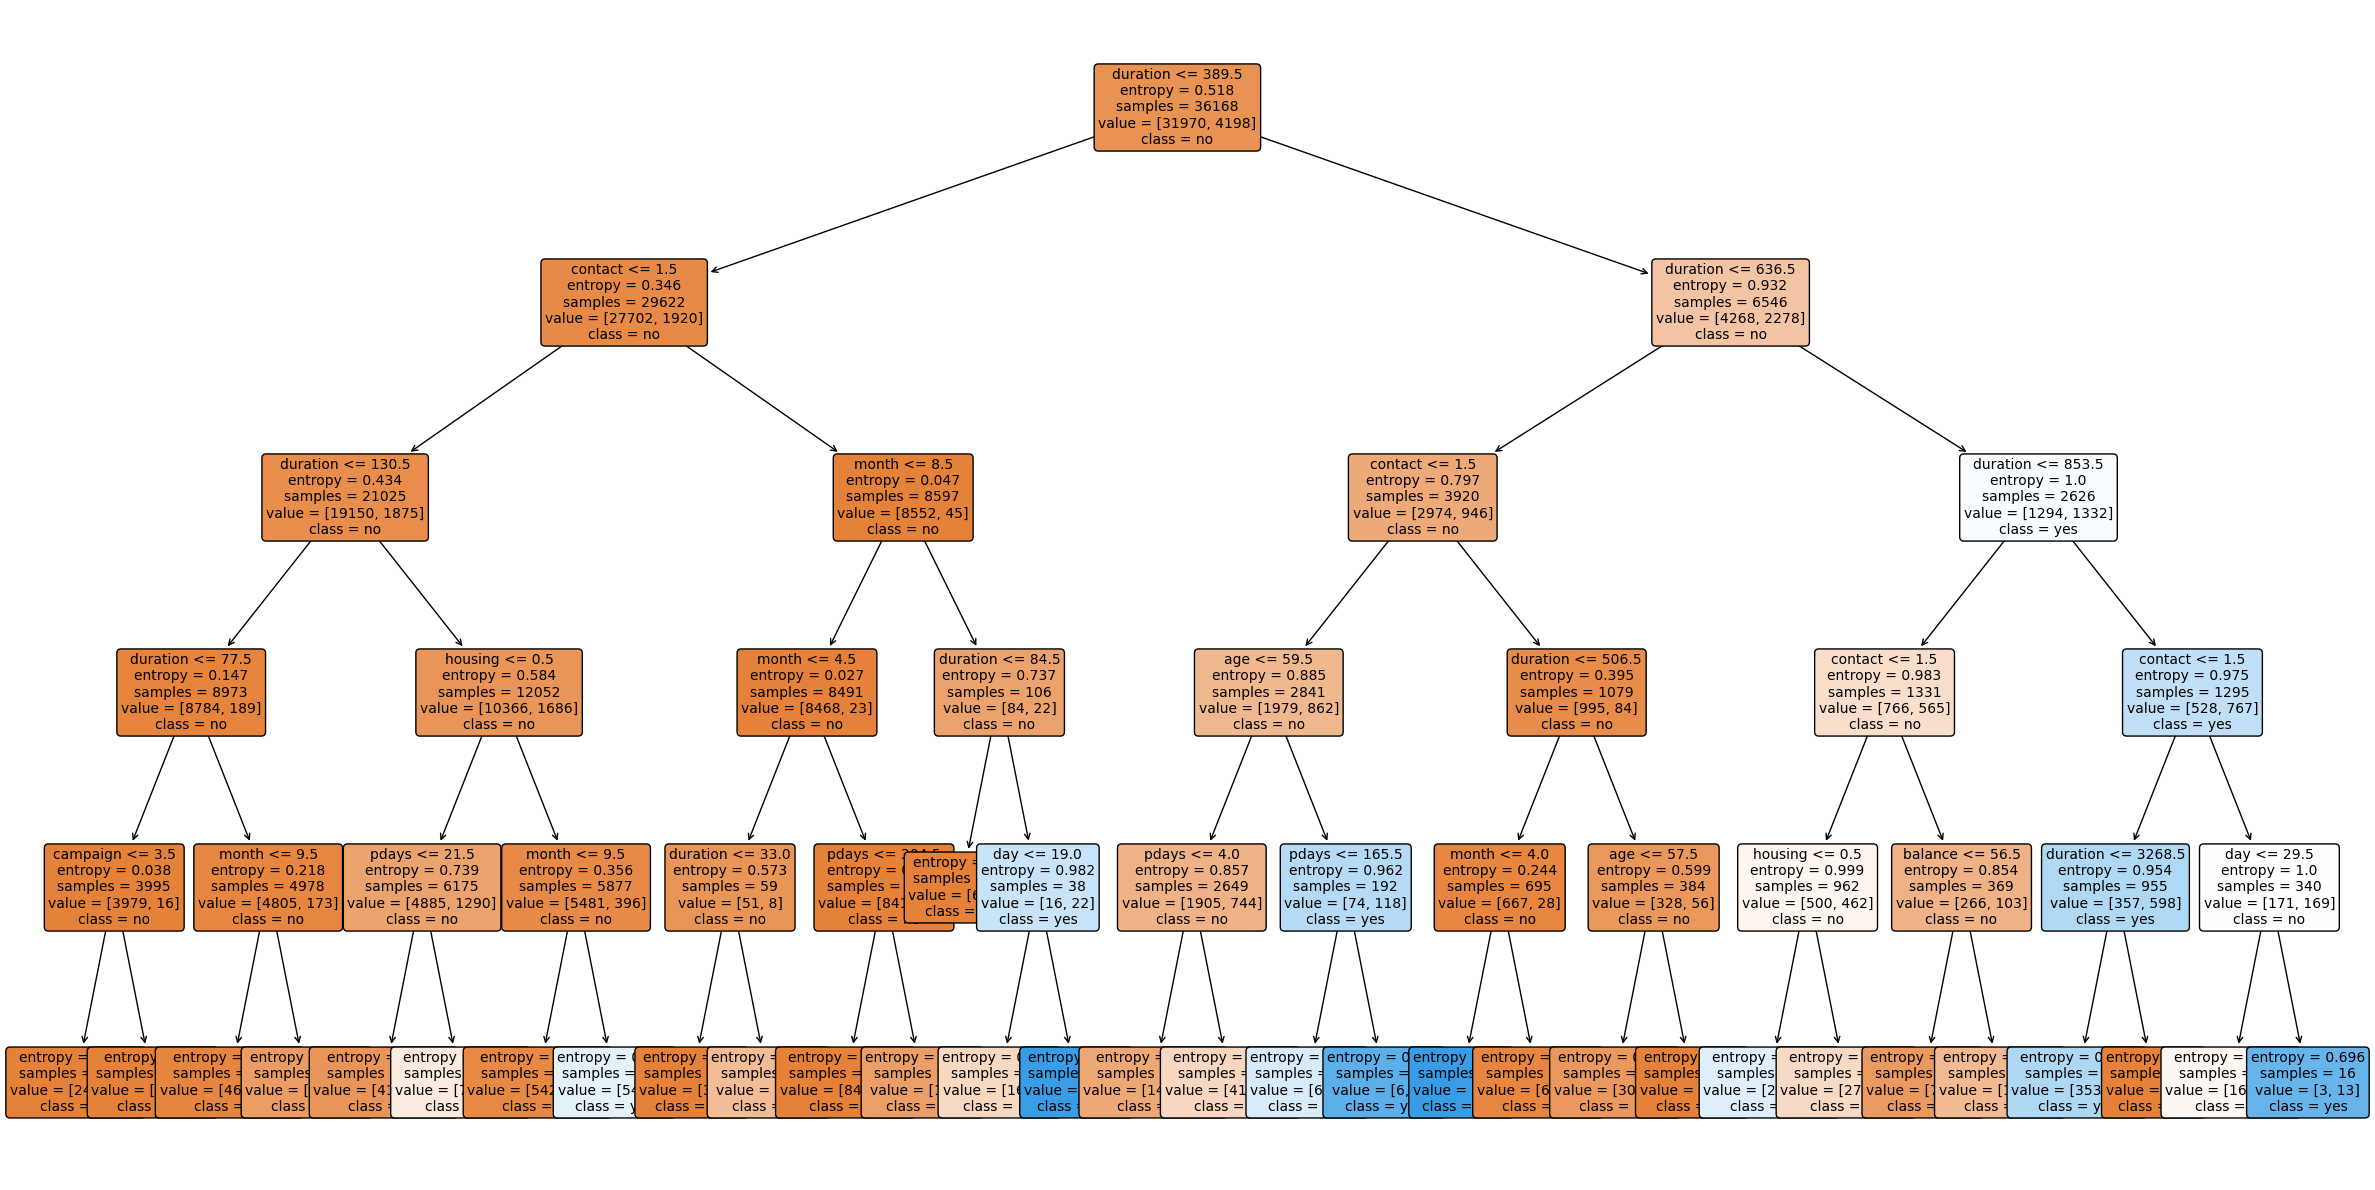

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 12))  
plot_tree(
    dt_model,
    feature_names=X.columns.tolist(),   
    class_names=['no', 'yes'],
    filled=True,
    rounded=True,                    
    fontsize=10                       
)
plt.tight_layout()
plt.show()